Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [86]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [87]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [88]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [89]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [90]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [91]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [92]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [93]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

In [94]:
def parse_image(filename):
  parts = tf.strings.split(filename, os.sep)
  label = parts[-2]

  image = tf.io.read_file(filename)
  image = tf.io.decode_jpeg(image)
  image = tf.image.convert_image_dtype(image, tf.float32)
  image = tf.image.resize(image, [128, 128])
  return image, label

In [95]:
import matplotlib.pyplot as plt


list_ds = tf.data.Dataset.list_files(str(data_dir_train/'*/*'))




### your code goes here, you can use training or validation data to visualize

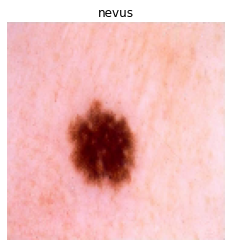

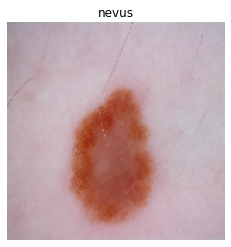

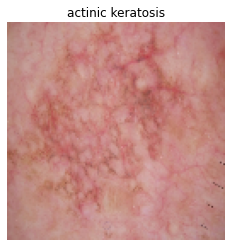

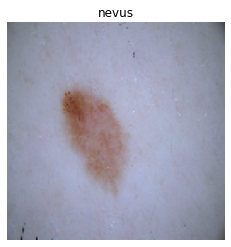

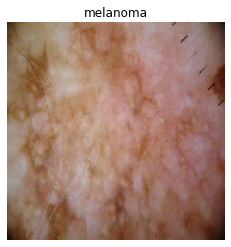

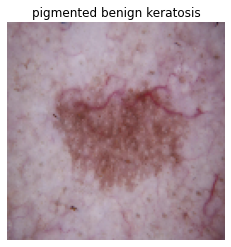

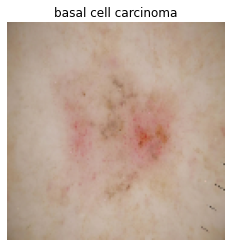

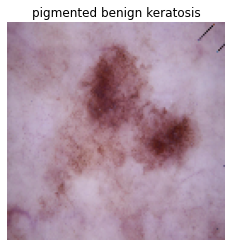

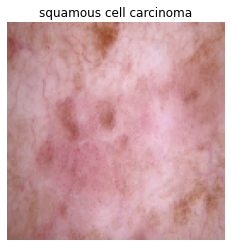

In [96]:

def show(image, label):
  plt.figure()
  plt.imshow(image)
  plt.title(label.numpy().decode('utf-8'))
  plt.axis('off')

images_ds = list_ds.map(parse_image)

for image, label in images_ds.take(len(class_names)):
  show(image, label)


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [97]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [98]:
input_shape = ( 180, 180, 3)

In [114]:
### Your code goes here
model = Sequential()
model.add(layers.Rescaling(1./255, input_shape=input_shape))
model.add(layers.Conv2D(32, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model.add(layers.Conv2D(64, kernel_size=(5, 5), 
                 activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(8, 8)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(len(class_names), activation='softmax'))



### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [115]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [116]:
# View the summary of all layers
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_9 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_22 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 conv2d_23 (Conv2D)          (None, 180, 180, 64)      51264     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 22, 22, 64)       0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 30976)             0         
                                                                 
 dense_16 (Dense)            (None, 128)               3965056   
                                                      

### Train the model

In [117]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 48s 129ms/step - loss: 1.8489 - accuracy: 0.2956 - val_loss: 1.5603 - val_accuracy: 0.3994
Epoch 2/20
169/169 [==============================] - 14s 81ms/step - loss: 1.3870 - accuracy: 0.4863 - val_loss: 1.1861 - val_accuracy: 0.5523
Epoch 3/20
169/169 [==============================] - 14s 83ms/step - loss: 1.1270 - accuracy: 0.5864 - val_loss: 1.0467 - val_accuracy: 0.6266
Epoch 4/20
169/169 [==============================] - 14s 81ms/step - loss: 0.9536 - accuracy: 0.6528 - val_loss: 0.9570 - val_accuracy: 0.6615
Epoch 5/20
169/169 [==============================] - 14s 81ms/step - loss: 0.7485 - accuracy: 0.7242 - val_loss: 0.9171 - val_accuracy: 0.6889
Epoch 6/20
169/169 [==============================] - 14s 81ms/step - loss: 0.5962 - accuracy: 0.7914 - val_loss: 0.8768 - val_accuracy: 0.7164
Epoch 7/20
169/169 [==============================] - 14s 82ms/step - loss: 0.4884 - accuracy: 0.8307 - val_loss: 0.8449 - val_accuracy

### Visualizing training results

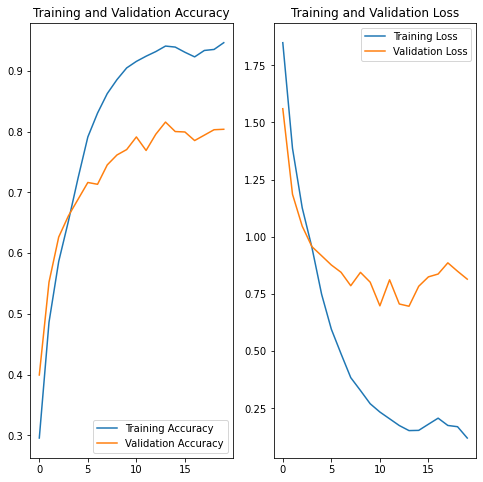

In [118]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

After epoch 6, overfitting started, as the training datat accuracy is increasing wheras for validation data, accuracy is not improving

### Write your findings here

In [125]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
augmentation = keras.Sequential(
  [
    layers.RandomFlip('horizontal_and_vertical', input_shape=input_shape),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
  ]
)


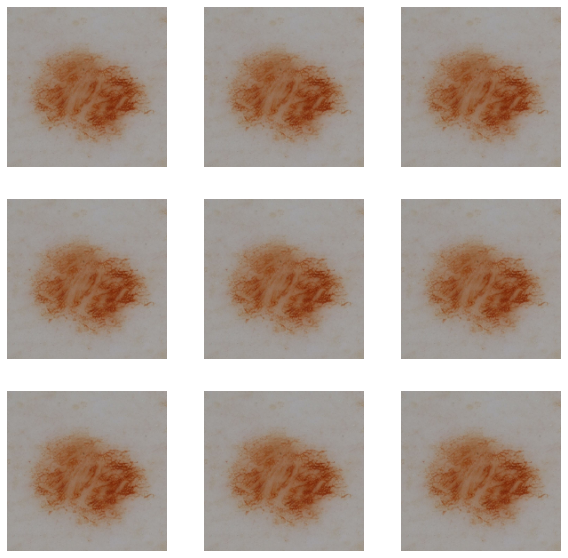

In [126]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")


### Todo:
### Create the model, compile and train the model


In [127]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

model = Sequential([augmentation])   #added augmentation
model.add(layers.Rescaling(1./255, input_shape=input_shape))
model.add(layers.Conv2D(32, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model.add(layers.Conv2D(64, kernel_size=(5, 5), 
                 activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(8, 8)))
model.add(layers.Dropout(0.2))    #added dropout
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(len(class_names), activation='softmax'))


### Compiling the model

In [128]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


### Training the model

In [129]:
## Your code goes here, note: train your model for 20 epochs
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


169/169 [==============================] - 16s 87ms/step - loss: 1.8008 - accuracy: 0.3058 - val_loss: 1.5199 - val_accuracy: 0.4098
Epoch 2/20
169/169 [==============================] - 14s 86ms/step - loss: 1.5205 - accuracy: 0.4123 - val_loss: 1.4763 - val_accuracy: 0.4521
Epoch 3/20
169/169 [==============================] - 14s 85ms/step - loss: 1.4356 - accuracy: 0.4445 - val_loss: 1.3094 - val_accuracy: 0.4707
Epoch 4/20
169/169 [==============================] - 14s 85ms/step - loss: 1.3671 - accuracy: 0.4850 - val_loss: 1.2787 - val_accuracy: 0.5011
Epoch 5/20
169/169 [==============================] - 14s 85ms/step - loss: 1.3273 - accuracy: 0.4883 - val_loss: 1.2198 - val_accuracy: 0.5330
Epoch 6/20
169/169 [==============================] - 14s 85ms/step - loss: 1.3101 - accuracy: 0.4972 - val_loss: 1.2765 - val_accuracy: 0.5338
Epoch 7/20
169/169 [==============================] - 14s 85ms/step - loss: 1.2547 - accuracy: 0.5249 - val_loss: 1.2672 - val_accuracy: 0.5360
Epo

### Visualizing the results

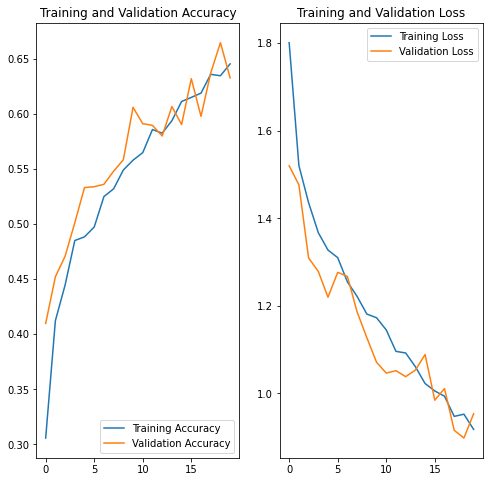

In [130]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

Although the accuracy and loss are similar for validation and training, the accuracy has been reduced significantly as compared to previous model


#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [131]:
labels = []
for x, y in train_ds:
  labels.append(y.numpy())

labels = np.concatenate(labels, axis = 0) 

In [132]:
label_dict = {}
for x in range(0, (len(class_names))):
  label_dict[x] = class_names[x]

In [133]:
(pd.Series(labels).map(label_dict).value_counts()/len(labels)).sort_values()

dermatofibroma                0.084384
seborrheic keratosis          0.084570
vascular lesion               0.091432
actinic keratosis             0.091432
squamous cell carcinoma       0.105527
nevus                         0.125556
basal cell carcinoma          0.133717
melanoma                      0.140022
pigmented benign keratosis    0.143361
dtype: float64

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


dermatofibroma has least number of samples\
pigmented benign keratosis dominates the training dataset


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [57]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [62]:
path_to_training_dataset="/content/gdrive/MyDrive/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FA64C969190>: 100%|██████████| 500/500 [00:21<00:00, 23.08 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FA67E080450>: 100%|██████████| 500/500 [00:21<00:00, 23.70 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FA67E088150>: 100%|██████████| 500/500 [00:24<00:00, 20.76 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1242x1284 at 0x7FA64CC73B50>: 100%|██████████| 500/500 [01:37<00:00,  5.12 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FA67E088B10>: 100%|██████████| 500/500 [01:39<00:00,  5.04 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FA680BCFDD0>: 100%|██████████| 500/500 [00:21<00:00, 23.51 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7FA64CA22E50>: 100%|██████████| 500/500 [00:47<00:00, 10.47 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FA64C9A52D0>: 100%|██████████| 500/500 [00:20<00:00, 23.92 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FA67E088B10>: 100%|██████████| 500/500 [00:20<00:00, 24.46 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [134]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [136]:
from glob import glob

In [137]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/gdrive/MyDrive/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0031228.jpg_9f65f81b-06e5-4c4c-add9-726e8de4777e.jpg',
 '/content/gdrive/MyDrive/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0032437.jpg_5733cc7a-312f-4e06-9906-73bba4641135.jpg',
 '/content/gdrive/MyDrive/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026626.jpg_8b738468-4205-40d1-9c06-78a07b2babce.jpg',
 '/content/gdrive/MyDrive/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0032437.jpg_c7162d45-aaed-4e0d-becf-27c58d40ed09.jpg',
 '/content/gdrive/MyDrive/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis

In [138]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [139]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [140]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df =df2

In [141]:
new_df['Label'].value_counts()

actinic keratosis             500
pigmented benign keratosis    500
basal cell carcinoma          500
seborrheic keratosis          500
melanoma                      500
dermatofibroma                500
nevus                         500
squamous cell carcinoma       500
vascular lesion               500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [142]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [143]:
data_dir_train="/content/gdrive/MyDrive/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [144]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [145]:
## your code goes here
model = Sequential()
model.add(layers.Rescaling(1./255, input_shape=input_shape))
model.add(layers.Conv2D(32, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model.add(layers.Conv2D(64, kernel_size=(5, 5), 
                 activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(8, 8)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(len(class_names), activation='softmax'))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [146]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [147]:
epochs=30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 38s 215ms/step - loss: 1.8657 - accuracy: 0.2991 - val_loss: 1.4488 - val_accuracy: 0.4402
Epoch 2/30
169/169 [==============================] - 38s 217ms/step - loss: 1.3864 - accuracy: 0.4711 - val_loss: 1.3282 - val_accuracy: 0.4952
Epoch 3/30
169/169 [==============================] - 38s 217ms/step - loss: 1.1428 - accuracy: 0.5762 - val_loss: 1.1059 - val_accuracy: 0.5947
Epoch 4/30
169/169 [==============================] - 36s 208ms/step - loss: 0.9268 - accuracy: 0.6762 - val_loss: 0.9697 - val_accuracy: 0.6385
Epoch 5/30
169/169 [==============================] - 36s 208ms/step - loss: 0.7815 - accuracy: 0.7179 - val_loss: 0.8889 - val_accuracy: 0.6837
Epoch 6/30
169/169 [==============================] - 40s 229ms/step - loss: 0.6123 - accuracy: 0.7795 - val_loss: 0.8084 - val_accuracy: 0.7216
Epoch 7/30
169/169 [==============================] - 36s 209ms/step - loss: 0.5215 - accuracy: 0.8171 - val_loss: 0.7996 - val_ac

#### **Todo:**  Visualize the model results

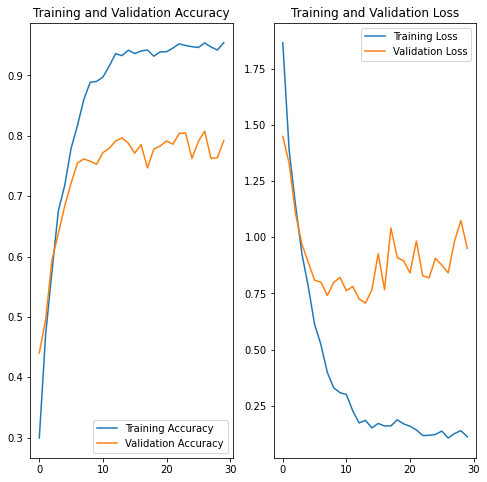

In [148]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



we were able to get rid of overfitting to an extent, but after epoch 7, the overfitting can be countered, thus we need to reduce the number of epochs